# Soal 1. Pemahaman k-means clustering

Jelaskan bagaimana cara kerja k-means clustering!

Jawab disini:



Cara kerja atau tahapan dari k-means clustering adalah seperti berikut

- Menginisiasi jumlah kluster secara random, pemilihan jumlah kluster yang tepat bisa menggunakan Elbow Method atau Silhouette Method. 
- Menentukan posisi centroid secara random.
- Menghitung jarak antara data point ke centroid. Melakukan assign setiap data ke centroid terdekat yang akan membentuk  k clusters.Perhitungan jarak antara titik data ke centroid menggunakan formula euclidean distance
- Kemudian hitung ulang centroid berdasarkan label-label data sebelumnya. Disini kita buat kembali centroid baru dan menghitung kembali jarak antar data poin ke centroid.
- Kemudian di assign kembali data poin ke centroid terdekat yang terbaru, dan kita cek apakah ada perubahan dalam cluster atau tidak, jika ada maka kita perlu kembali ke poin 4 mencari posisi centroid yang tidak mengubah cluster. Hal ini kita lakukan perulangan sampai posisi centroid tidak berubah lagi. 

Download disini [pelanggan.csv](https://drive.google.com/uc?export=download&id=1jX_rLPfcCfzEEgy9xaoALmpqfU2s5TTB)

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

#df = pd.read_csv('/content/pelanggan_supermarket.csv')
df = pd.read_csv('pelanggan_supermarket.csv')

df.head()

,ID_pelanggan,Jenis Kelamin,Umur,Pendapatan pertahun (juta),Skor Belanja (1-100)
0,1,Laki-laki,19.0,15,39.0
1,2,Laki-laki,21.0,15,81.0
2,3,Perempuan,20.0,16,6.0
3,4,Perempuan,23.0,16,77.0
4,5,Perempuan,31.0,17,40.0


# Soal 2. Clustering data menggunakan k-means clustering

Dalam soal ini, kalian diminta untuk melakukan clustering antara data Umur dan Skor Belanja(1-100). Namun, clustering tidak bisa dilakukan karena data memiliki outlier dan missing value. Maka, lakukanlah tahapan-tahapan berikut:

*   Handling missing value dengan menggunakan method ='ffill'
*   Handling outlier menggunakan metode Interquartile range
*   Lakukan rescaling data menggunakan StandardScaler
*   Lakukan clustering menggunakan kmeans clustering dengan k =2, dan visualisasikan..
*   Gunakan Elbow method untuk menemukan jumlah k kluster yang tepat
*   Gunakan k=3 (rekomendasi methode Elbow) lalu visualisasikan
*   Hitung silhoutte Coefficient dari ke dua hasil prediksi klustering tersebut










In [4]:
# code di sini
missing_count = df.isna().sum()
#print(missing_count)

#df_filled = df.ffill()
df.ffill(inplace=True)
missing_count2 = df.isna().sum()
#print(missing_count2)

#skor_belanja = df_filled['Skor Belanja (1-100)']

#print(skor_belanja)
def get_lower_upper(x):
    Q1 = np.quantile(x, .25)
    Q3 = np.quantile(x, .75)
    IQR = Q3 - Q1
    Lb=Q1 -(IQR*1.5)
    Ub=Q3+(IQR*1.5)
    return Lb, Ub
    
get_lower_upper(df['Skor Belanja (1-100)'])

(-43.5, 144.5)

In [5]:
def get_outliers_iqr(x):
    Lb, Ub = get_lower_upper(x)
    return x[np.where((x > Ub) | (x < Lb))]
#df2 = df2[~((x < Lb) | (x > Ub))]


print(get_outliers_iqr(df['Skor Belanja (1-100)'].values))
print(get_outliers_iqr(df['Umur'].values))


[150.]
[120.]


<Axes: xlabel='Skor Belanja (1-100)'>

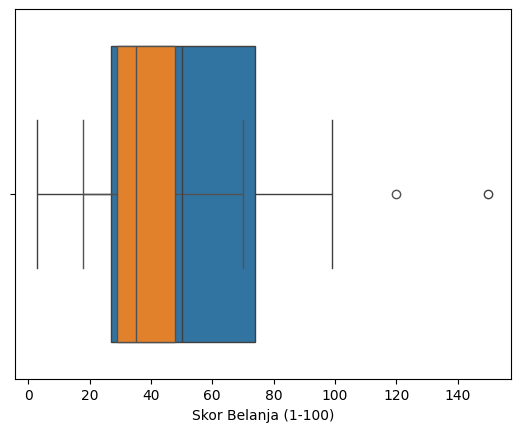

In [63]:
import seaborn as sns
sns.boxplot(x='Skor Belanja (1-100)', data=df)
sns.boxplot(x='Umur', data=df)


In [6]:
def remove_outliers_iqr(df):
    Q1=np.quantile(df, .25)
    Q3=np.quantile(df, .75)
    IQR = Q3-Q1
    df_final= df[~((df < (Q1-1.5*IQR)) | (df > (Q3+1.5*IQR)))]
    return df_final

#remove_outliers_iqr(df['Skor Belanja (1-100)'])
df_outlier_removed=remove_outliers_iqr(df[['Skor Belanja (1-100)', 'Umur']])
df_outlier_removed.dropna(axis=0, inplace=True)
df_outlier_removed

,Skor Belanja (1-100),Umur
0,39.0,19.0
1,81.0,21.0
2,6.0,20.0
3,77.0,23.0
4,40.0,31.0
...,...,...
244,69.0,27.0
245,14.0,59.0
246,90.0,35.0
247,32.0,37.0


<Axes: xlabel='Skor Belanja (1-100)'>

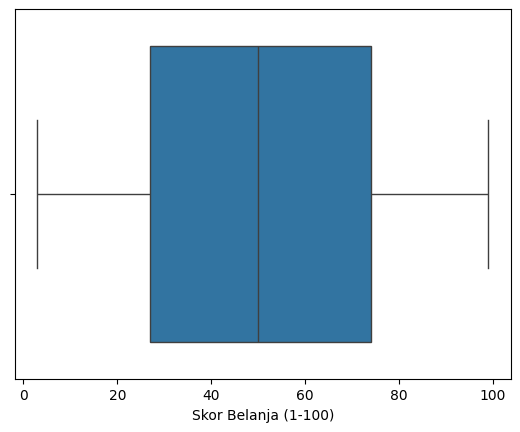

In [73]:
sns.boxplot(x='Skor Belanja (1-100)', data=df_outlier_removed)

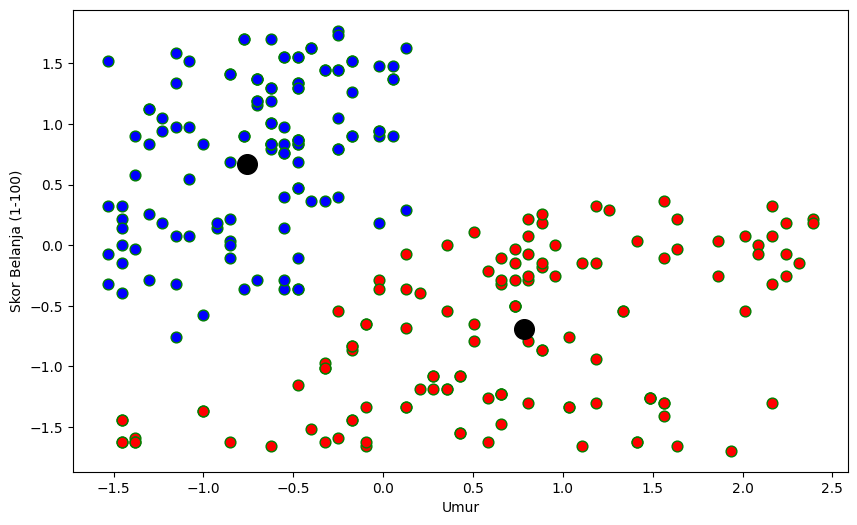

In [39]:
sc = StandardScaler()
df_outlier_std = sc.fit_transform(df_outlier_removed.astype(float))

#Lakukan clustering menggunakan kmeans clustering dengan k =2, dan visualisasikan
kmeans1 = KMeans(n_clusters=2, random_state=42).fit(df_outlier_std)
labels1 = kmeans1.labels_

new_df_outlier_std = pd.DataFrame(data = df_outlier_std, columns = ['Skor Belanja (1-100)','Umur'])
new_df_outlier_std['label_kmeans1'] = labels1

plt.figure(figsize=(10,6))
plt.scatter(new_df_outlier_std.Umur[new_df_outlier_std.label_kmeans1 == 0], new_df_outlier_std['Skor Belanja (1-100)'][new_df_outlier_std.label_kmeans1 == 0], c='red', s=60,edgecolor='green', linestyle='-')
plt.scatter(new_df_outlier_std.Umur[new_df_outlier_std.label_kmeans1 == 1], new_df_outlier_std['Skor Belanja (1-100)'][new_df_outlier_std.label_kmeans1 == 1], c='blue', s=60,edgecolor='green', linestyle='-')

centers = kmeans1.cluster_centers_
plt.scatter(centers[:,0], centers[:, 1], c='black', s=200);
plt.xlabel('Umur')
plt.ylabel('Skor Belanja (1-100)')
plt.show()

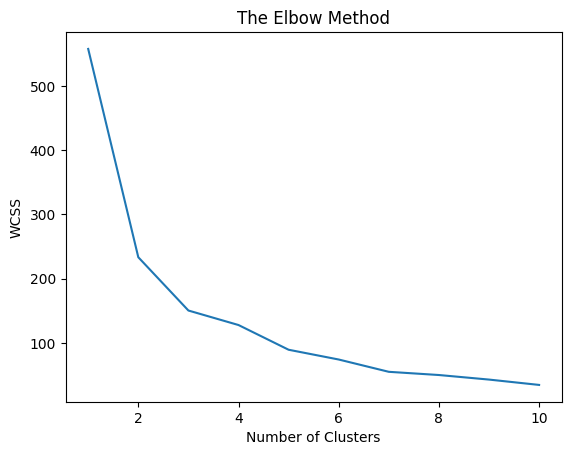

In [16]:
#Gunakan Elbow method untuk menemukan jumlah k kluster yang tepat
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init='k-means++', random_state = 42)
    kmeans.fit(new_df_outlier_std)
    wcss.append(kmeans.inertia_)

plt.plot(range(1,11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

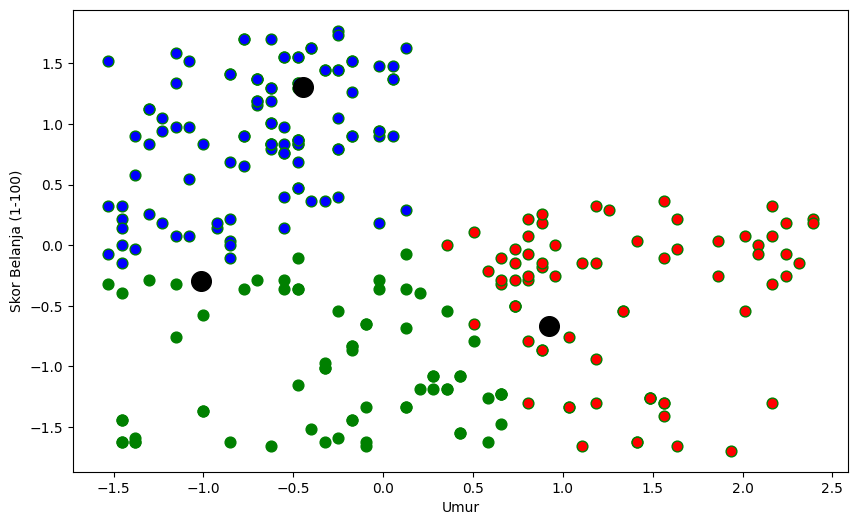

In [36]:
#Gunakan k=3 (rekomendasi methode Elbow) lalu visualisasikan
kmeans2 = KMeans(n_clusters=3, random_state=42).fit(df_outlier_std)
labels2 = kmeans2.labels_

new_df_outlier_std = pd.DataFrame(data = df_outlier_std, columns = ['Skor Belanja (1-100)','Umur'])
new_df_outlier_std['label_kmeans2'] = labels2

plt.figure(figsize=(10,6))
plt.scatter(new_df_outlier_std.Umur[new_df_outlier_std.label_kmeans2 == 0], new_df_outlier_std['Skor Belanja (1-100)'][new_df_outlier_std.label_kmeans2 == 0], c='green', s=60,edgecolor='green', linestyle='-')
plt.scatter(new_df_outlier_std.Umur[new_df_outlier_std.label_kmeans2 == 1], new_df_outlier_std['Skor Belanja (1-100)'][new_df_outlier_std.label_kmeans2 == 1], c='blue', s=60,edgecolor='green', linestyle='-')
plt.scatter(new_df_outlier_std.Umur[new_df_outlier_std.label_kmeans2 == 2], new_df_outlier_std['Skor Belanja (1-100)'][new_df_outlier_std.label_kmeans2 == 2], c='red', s=60,edgecolor='green', linestyle='-')

centers = kmeans2.cluster_centers_
plt.scatter(centers[:,0], centers[:, 1],  c='black', s=200);
plt.xlabel('Umur')
plt.ylabel('Skor Belanja (1-100)')
plt.show()

In [41]:
#Hitung silhoutte Coefficient dari ke dua hasil prediksi klustering tersebut
from sklearn.metrics import silhouette_score

print(silhouette_score(new_df_outlier_std, labels=labels1))
print(silhouette_score(new_df_outlier_std, labels=labels2))

0.5348459173768796
0.4748543298707482


Expected output:

n_cluster =2

![](https://drive.google.com/uc?id=1RHedPeGR48w-cWl7WWkIsHTSB2DRgynO)


Elbow graph

![](https://drive.google.com/uc?id=1S3_uvQWzJCi8YwSBbpu2imKbUBZ3JdmV)

n_cluster =3

![](https://drive.google.com/uc?id=1EVMDQgPpC8vYpfxilyiJMRDNIr-JXULd)



---



---



---



# Soal 3. Analisa Data Hasil Clustering

Dari hasil klustering diatas, buatlah sebuah analisa segmentasi pelanggan untuk kemajuan supermarket.

Jawab disini:
Pada Gambar dengan K=2, mebentuk dua klaster, 
- di mana warna biru menunjukkan umur muda dengan skor belanja besar,
- sedangkan warna merah menunjukkan umur muda skor belanja sedikit dan semakin bertambah umur skor belanja semakin besar, kemungkinan juga pengaruh dari pendapatan pertahun yang tidak diikut sertakan dalam gambar/clustering
  
Sedangkan pada Gambar dengan K=3, terbentuk 3 klaster yaitu Biru, Hijau dan Merah, 
- Biru menunjukkan umur muda dengan skor belanja tinggi
- Hijau menunjukkan umur muda dengan skor belanja kecil
- dan Merah menunjukkan umur tua dengan skor belanja kecil ke tinggi

Dilihat dari hasil silhouette, nilai K=2 lebih tinggi dari pada K=3, jadi K=2 lebih bisa di bedakan dan bisa di ambil analisannya